In [1]:
from src.fibered.fibred import *
from src.fibered.plot import *
import pickle
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
inline_rc = dict(mpl.rcParams)

In [2]:
# load:
# X stands for the attractor data, which consists of samples in Euclidean space
# X_dm is a distance matrix, computed as the shortest path distance in a 15-nn graph on X
# pi is a circular coordinate on the data, embedded in 3D

with open('data/torus-data.pckl', 'rb') as handle:
    X, X_dm, pi = pickle.load(handle)

In [3]:
k = 16 ; d = 3 ; e = 1
fibred_embedding = fibered(X_dm, pi, k, e, d, fib_scale=3/4)

In [4]:
# plot the first 3 components of the 4D embedding
plot_3d(fibred_embedding, size=1, width=500, height=300)

In [5]:
# compute a geodesic distance on the embedding
dm_embedding = geodesicDistance(fibred_embedding, k=15)

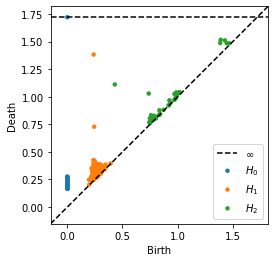

In [6]:
# compute the PD with Z/2 coefficients
dgms = ripser(dm_embedding, n_perm=300, maxdim=2, coeff=2, distance_matrix=True)['dgms']
plot_diagrams(dgms) ; mpl.rcParams.update(inline_rc)

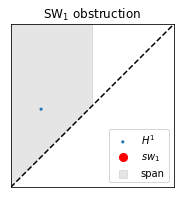

In [7]:
# compute the SW obstructions:
from src.fibered.topologicalobstructions import *
cover_base, nerve_base, centers_base, omegas = obstructionsData(X_dm, pi, k, e, d)
sol, basis, dth, dgms = sw1_obstruction(X_dm, nerve_base, centers_base, omegas)
plot_sw(sol, basis, dth, dgms, [0.5,1.5], "", "SW$_1$ obstruction", size=3, save=False) ; mpl.rcParams.update(inline_rc)